In [ ]:
#TOC

# Step 1. Download the data

In [1395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
import datetime as dt
from functools import reduce
from scipy import stats as st
import plotly.express as px
import scipy.stats as stats
import plotly.graph_objects as go

from plotly.graph_objects import Layout
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")    

In [1396]:
# upload the data
try: 
    df = pd.read_csv('gym_churn_us.csv')
except:
    df = pd.read_csv('/datasets/gym_churn_us.csv')

# Step 2. Carry out exploratory data analysis (EDA)

In [1397]:
# first look at the data
display(df.head(10))
display(df.info())
display(df.describe())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

None

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [1398]:
# the df contains 4000 rows
# all columns are in int / float format


# age - all customers are between the age of 18-41, with average and median age of 29. 
# lifetime - the median lifetime is, the average lifetime is 3.72
# churen column represent customers who stayed - 1 and customers who left - 0 

## Data Preproecessing

In [1399]:
# lowercase columns
df.columns= df.columns.str.lower()

# missing values 
display('null values:', df.isnull().sum())

# duplicated rows
display('duplicated rows:', df[df.duplicated() == True].count())

# conversions
# Different conversions such as normalization and standardization will be considered at the next stages.

'null values:'

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

'duplicated rows:'

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

## Features Analysis

### binary / non binary features analysis

#### Seperate data into binary/non binary features

In [1400]:
# detect binary and non-binary columns

binary = []
non_binary = []

for i in df.columns:
#    print(str(i) + ' unique values: {}'.format(df[i].nunique()))
    if df[i].nunique() == 2:
        binary.append(i)
    else:
        non_binary.append(i)

In [1401]:
# display the two types of features sepertaly 
print('binary features:\n', binary)
print('\nnon binary features:\n', non_binary)

binary features:
 ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']

non binary features:
 ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']


#### Conclusions:
The features in the data are evenly divided: 7 columns of binary, 7 columns of non-binary

##  Raw Data Analysis

### Non Binary Features - Histograms & Statistics

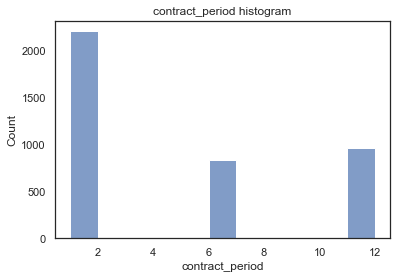

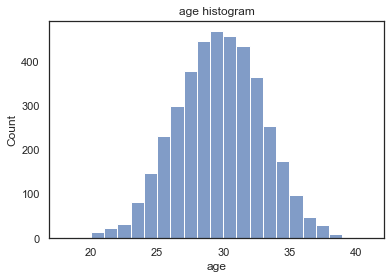

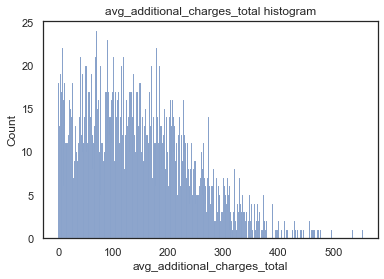

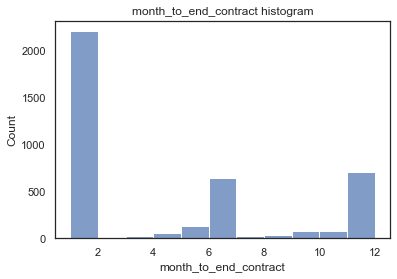

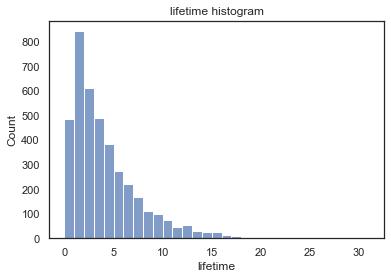

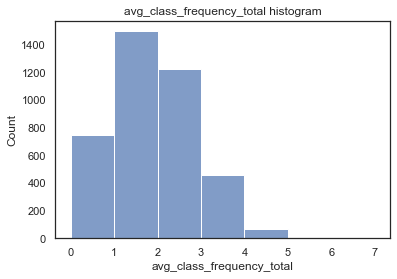

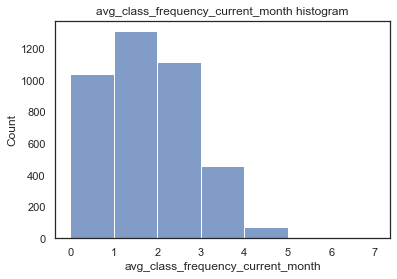

In [1402]:
# scan histograms for distribution of non_binary data 
for i in non_binary:
    sns.histplot(data=df, x=i, binwidth=1, alpha = 0.7)
    plt.title(str(i) + ' histogram')
    plt.show()

#### Preliminary Conclusions:

- Age columns is normally distributed with a mean of 29.
- Columns with skewed distribution: most notebly age_additional_charges_total, lifetime (both skewed left)



- contract period: 
    - The majoriy of the customers signes a 1 month contract only, this could be a cause of concern which can result in very high churn rate. 
    - Also, we see suspiciously that none of the customers signed to a 3 month contract. This could be either a problem with the input data during regestration, or due to the fact that most customer prefer either a very short,medium or long contract period. Still, in data of 4000 rows, it's unlikely.


- avg_additional_charges_total: we see a very dense histogram between 0 - 300 dollars. Data from describe() shows a mean and median of 146 and 136 dollars, respectevly. This is a good sign for additional revenue. 


- month to end contract: As expected, similar pattern to contract_period, high risk for Multicollinearity


- Lifetime column: As expected due to contract_period columns, most customers in this data are pretty fresh, 6 months or less since registration


- avg_class_frequency_current_month; average_class_frequency_current_total columns: 
    - we see that both columns are highly correlated, this could effect the future ML model and make overfitting (Multicollinearity). The columns show that the majoriy of the customers visit the gym between 1-3 times a week.



  - <b> Multicollinearity </b>: a strong correlation among several features.
  - Features with high correlation: 
      - 1. avg_class_frequency_current_month & average_class_frequency_current_total
      - 2. month to end contract & contract_period. 

### Non Binary Features - Unique Values counts

In [1403]:
for i in non_binary:
    print(str(i) + ' unique values: {}'.format(df[i].nunique()))

contract_period unique values: 3
age unique values: 23
avg_additional_charges_total unique values: 4000
month_to_end_contract unique values: 12
lifetime unique values: 29
avg_class_frequency_total unique values: 3913
avg_class_frequency_current_month unique values: 3820


#### Conclusions: 
- some of the featrues are characterized with high values range and some with low range. This should be noted for features weight analysis

### Non Binary Features - Statistical Data

In [1404]:
# Statistical data: binary:
df_non_binary = df[np.intersect1d(df.columns, non_binary)]
df_non_binary.describe()

,age,avg_additional_charges_total,avg_class_frequency_current_month,avg_class_frequency_total,contract_period,lifetime,month_to_end_contract
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,29.184250,146.943728,1.767052,1.879020,4.681250,3.724750,4.322750
std,3.258367,96.355602,1.052906,0.972245,4.549706,3.749267,4.191297
min,18.000000,0.148205,0.000000,0.000000,1.000000,0.000000,1.000000
25%,27.000000,68.868830,0.963003,1.180875,1.000000,1.000000,1.000000
50%,29.000000,136.220159,1.719574,1.832768,1.000000,3.000000,1.000000
75%,31.000000,210.949625,2.510336,2.536078,6.000000,5.000000,6.000000
max,41.000000,552.590740,6.146783,6.023668,12.000000,31.000000,12.000000


### Binary Features - Values Count

In [1405]:
# scan histograms for distribution of binary data 

for i in binary:
    display(df[i].value_counts())
    display('{}, "1" value accounts for {:.2%}'.format(i, (len(df[df[i] == 1]) / len(df))))

1    2041
0    1959
Name: gender, dtype: int64

'gender, "1" value accounts for 51.02%'

1    3381
0     619
Name: near_location, dtype: int64

'near_location, "1" value accounts for 84.52%'

0    2053
1    1947
Name: partner, dtype: int64

'partner, "1" value accounts for 48.68%'

0    2766
1    1234
Name: promo_friends, dtype: int64

'promo_friends, "1" value accounts for 30.85%'

1    3614
0     386
Name: phone, dtype: int64

'phone, "1" value accounts for 90.35%'

0    2351
1    1649
Name: group_visits, dtype: int64

'group_visits, "1" value accounts for 41.23%'

0    2939
1    1061
Name: churn, dtype: int64

'churn, "1" value accounts for 26.52%'

### Binary Features - Statistical Data

- binary columns (0 or 1):
- binary features can be address as categorical calssification - yes or no calssifiedv

In [1406]:
# Statistical data: binary:
df_binary = df[np.intersect1d(df.columns, binary)]
df_binary.describe()

,churn,gender,group_visits,near_location,partner,phone,promo_friends
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.265250,0.510250,0.412250,0.845250,0.486750,0.903500,0.308500
std,0.441521,0.499957,0.492301,0.361711,0.499887,0.295313,0.461932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Conclusions:

- Binary features with generally equal distribution (40-60 to 50-50): gender, Partner, Group_visits 
- Bineary features with unequal distrubition: Near_Location, Promo_friends, Phone, Churn
- gender, genger mean of 0.51 - equal men/women customer. 
- Churn mean is 0.26, meaning most of the customers left the membership.
- near location mean is 0.86, meaning most of the customers live nearby.
- most customers agreed to give their phone number
- promo friends - 0.3, meaning most of the customers signed with no discount
- 50% of the customers are by partner. 



In [1407]:
# question - is there a negetive correlation between nearby and churn rate?
# question - is phone really that valuable data? hypothesis- could be that customer who didn't are more likely to leave the gym (introverted)


## Churn vs. Stay groups analysis

### Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).

#### check mean before spiltting into groups using the groupby method 

In [1408]:
# method 1 - check mean for both binary and non-binary data
df_churn = df.groupby('churn')[df.columns.drop('churn')].mean().reset_index()
df_churn

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


#### Build table for stay / churn with mean values for both non_binary and binary features

In [1409]:
# split the data into customers who left (churn = 1) and stayed (churn = 0)
df_stay = df[df['churn'] == 0]
df_left = df[df['churn'] == 1]

In [1410]:
display(df_stay.shape)
display(df_left.shape)

(2939, 14)

(1061, 14)

#### non_binary data:

In [1411]:
# create mean table for non_binary features

# stay users: calculate mean for stay users
df_stay_non_binary_mean = df_stay[non_binary].mean(axis = 0).reset_index()
df_stay_non_binary_mean = df_stay_non_binary_mean.rename(columns = {0: 'mean'})

# churn users: calculate mean for stay users
df_left_non_binary_mean = df_left[non_binary].mean(axis = 0).reset_index()
df_left_non_binary_mean = df_left_non_binary_mean.rename(columns = {0: 'mean'})

# merge the two tables
df_stay_left_non_binary_mean = pd.merge(df_stay_non_binary_mean, df_left_non_binary_mean, on = 'index', left_index=True, right_index=True, suffixes = ('_stay','_churn'))
df_stay_left_non_binary_mean

,index,mean_stay,mean_churn
0,contract_period,5.747193,1.728558
1,age,29.976523,26.989632
2,avg_additional_charges_total,158.445715,115.082899
3,month_to_end_contract,5.283089,1.662582
4,lifetime,4.711807,0.990575
5,avg_class_frequency_total,2.024876,1.474995
6,avg_class_frequency_current_month,2.027882,1.044546


In [1412]:
# Conclusions- Groups Non Binary Features:
#

#### binary data:

In [1413]:
# create mean table for binary features

# stay users: calculate mean for stay users
df_stay_binary_mean = df_stay[binary].mean(axis = 0).reset_index()
df_stay_binary_mean = df_stay_binary_mean.rename(columns = {0: 'mean'})

# churn users: calculate mean for churn users
df_left_binary_mean = df_left[binary].mean(axis = 0).reset_index()
df_left_binary_mean = df_left_binary_mean.rename(columns = {0: 'mean'})

# merge the two tables
df_stay_left_binary_mean = pd.merge(df_stay_binary_mean, df_left_binary_mean, on = 'index', left_index=True, right_index=True, suffixes = ('_stay','_churn'))
df_stay_left_binary_mean

,index,mean_stay,mean_churn
0,gender,0.510037,0.510839
1,near_location,0.873086,0.768143
2,partner,0.534195,0.355325
3,promo_friends,0.353522,0.183789
4,phone,0.903709,0.902922
5,group_visits,0.464103,0.268615
6,churn,0.000000,1.000000


In [1414]:
# Conclusions- Groups Binary Features:
# - 

### Plot bar histograms and feature distributions for those who left (churn) and those who stayed.

#### Feautres Histograms for Non Binary Data

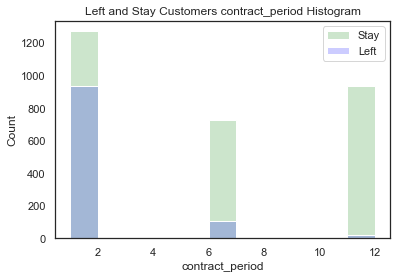

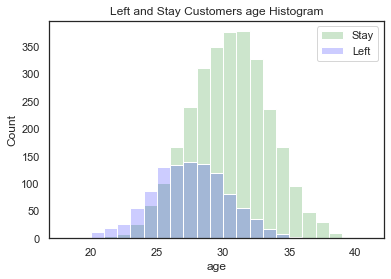

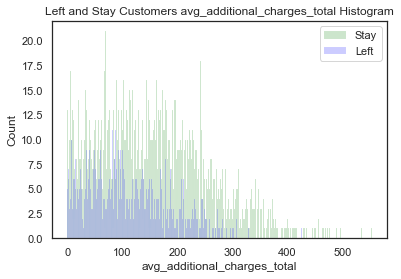

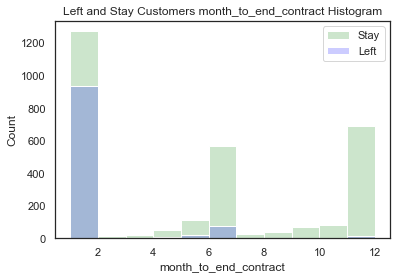

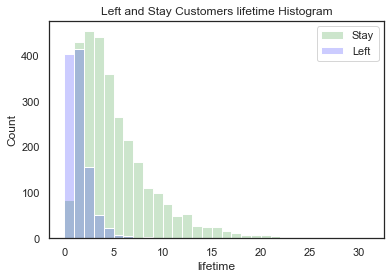

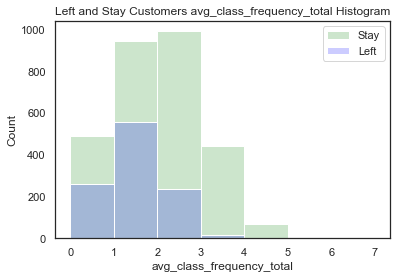

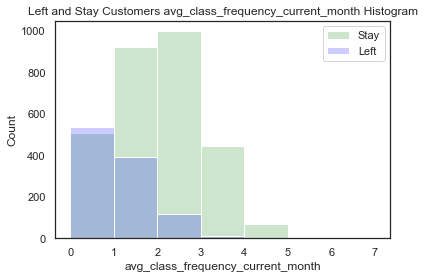

In [1415]:
# non binary features
for i in non_binary:

    # plot histograms for those who stayed
    sns.histplot(data=df_stay, x=i, binwidth=1, alpha = 0.2, color = 'green', label='Stay')

    # add histograms for those who left
    sns.histplot(data=df_left, x=i, binwidth=1, alpha = 0.2, color = 'blue', label='Left')
    plt.title('Left and Stay Customers ' + str(i) + ' Histogram')
    plt.legend()
    plt.show()      
  

### Feautres Histograms for Binary Data

#### Method 1: compare each feature between the two groups

In [1416]:
# binary features

for i in binary[:-1]:
        
        # plot histogram for those who stayed
        df_stay_count = df_stay[i].value_counts()
        #sns.barplot(data=df_stay_count, x = 'index', y = i, alpha = 0.7)
        #plt.title('Stay_Users ' + str(i) + ' barplot')
        #plt.show()
        df_left_count = df_left[i].value_counts()
        new = pd.merge(df_stay_count, df_left_count, left_index=True, right_index=True, suffixes = ('_ Stay','_ Left')).T
        new = new.rename(columns = {1:'1',0:'0'})

        fig = go.Figure()
        fig.add_trace(go.Bar(x=new.index, y=new['1'], name="1"))
        fig.add_trace(go.Bar(x=new.index, y=new['0'], name="0"))
        fig.update_layout(autosize=False,width=400,height=500, margin=dict(l=10, r=10, b=50, t=100, pad=8))
        
        fig.update_layout(
            title= {
                    'text': "{} Distribution".format(i), 
                    'y':0.85, 
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'
                   },
            xaxis_title = "Category",
            yaxis_title = "Count",
            
            font= dict(
                      size=10,
                      color="black"
    ))
        fig.show()

##### Method 2 - compare by group

In [1417]:
# stay group:
# build a df with the count users for each binary features using the sum() (counts all users with '1' value)
df_stay_count = df_stay[binary[:-1]].sum(axis = 0).reset_index()
# rename the column to 'count_1'
df_stay_count = df_stay_count.rename(columns = {0: 'count_1'})
# calculate the difference between the df length (no. of total users) and the count_1, get the count of '0' values
df_stay_count['count_0'] = len(df_stay) - df_stay_count['count_1'] 

# plot histogram for stay users (churn = 0)
#layout = Layout(plot_bgcolor='rgba(0,0,0,0)')
fig = go.Figure()
fig.add_trace(go.Bar(x=df_stay_count['index'], y=df_stay_count['count_1'], name="1"))
fig.add_trace(go.Bar(x=df_stay_count['index'], y=df_stay_count['count_0'], name="0"))
fig.update_layout(autosize=False,width=900,height=400, margin=dict(l=10, r=10, b=20, t=50, pad=4))
fig.update_layout(
    title="Stay Customers (churn = 0) - Binary Features Distributions",
    xaxis_title="Category",
    yaxis_title="Number of Customers",
    font=dict(size=12, color="black"))
fig.show()


# churn group:
# build a df with the count users for each binary features using the sum() (counts all users with '1' value)
df_left_count = df_left[binary[:-1]].sum(axis = 0).reset_index()
# rename the column to 'count_1'
df_left_count = df_left_count.rename(columns = {0: 'count_1'})
# calculate the difference between the df length (no. of total users) and the count_1, get the count of '0' values
df_left_count['count_0'] = len(df_left) - df_left_count['count_1'] 


# plot histogram for left users (churn = 1)
#layout = Layout(plot_bgcolor='rgba(0,0,0,0)')
fig = go.Figure()
fig.add_trace(go.Bar(x=df_left_count['index'], y=df_left_count['count_1'], name="1"))
fig.add_trace(go.Bar(x=df_left_count['index'], y=df_left_count['count_0'], name="0"))
fig.update_layout(autosize=False,width=900,height=350,margin=dict(l=10, r=10, b=20, t=50, pad=4))
fig.update_layout(
    title="Left Customers (churn = 1) - Binary Features Distributions",
    xaxis_title="Category",
    yaxis_title="Number of Customers",
    font=dict(size=12, color="black"))
fig.show()




#### Conclusions: comparing the two shows different patterns

- Size - Stay group contain about 3000 customers, which is 3 times more customers then Left (churn) group (~1000).


- Similar distributions:
    - gender
    - phone


- Different distributions:
   - near location: In the stay group, higher percent of customers are living nearby compare to those who left.
   - partner - Noticebly, In the left group: the number of customers that no sign up via partner is double then those who do. In the stay group they are distributed evenly.
   - Promo_friend: signing up using a friend coupon highly decrease the likelyhood of leaving the gym.
   - group sessions: customers who participate in group sessions are more likely to keep their membership. This could be a good strategy to motivate customers for group activies.

## Correlation matrixes

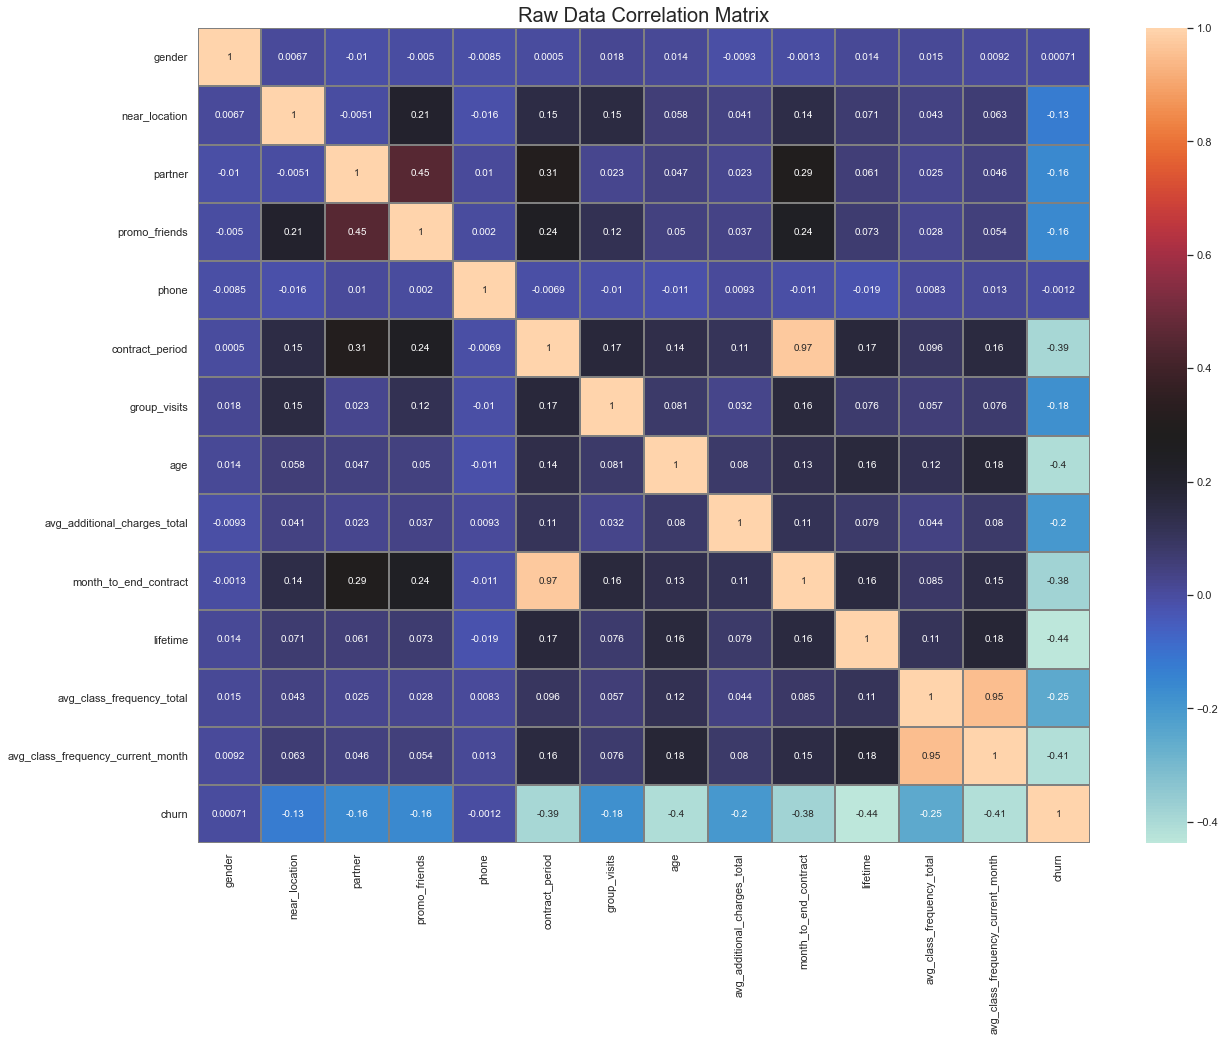

In [1418]:
# correlation matrix for the raw data
cm_raw = df.corr()
plt.figure(figsize = (20,15))
plt.title('Raw Data Correlation Matrix', fontsize=20)
sns.heatmap(cm_raw, linewidths=1, cmap='icefire', linecolor='gray', annot=True)
plt.show()

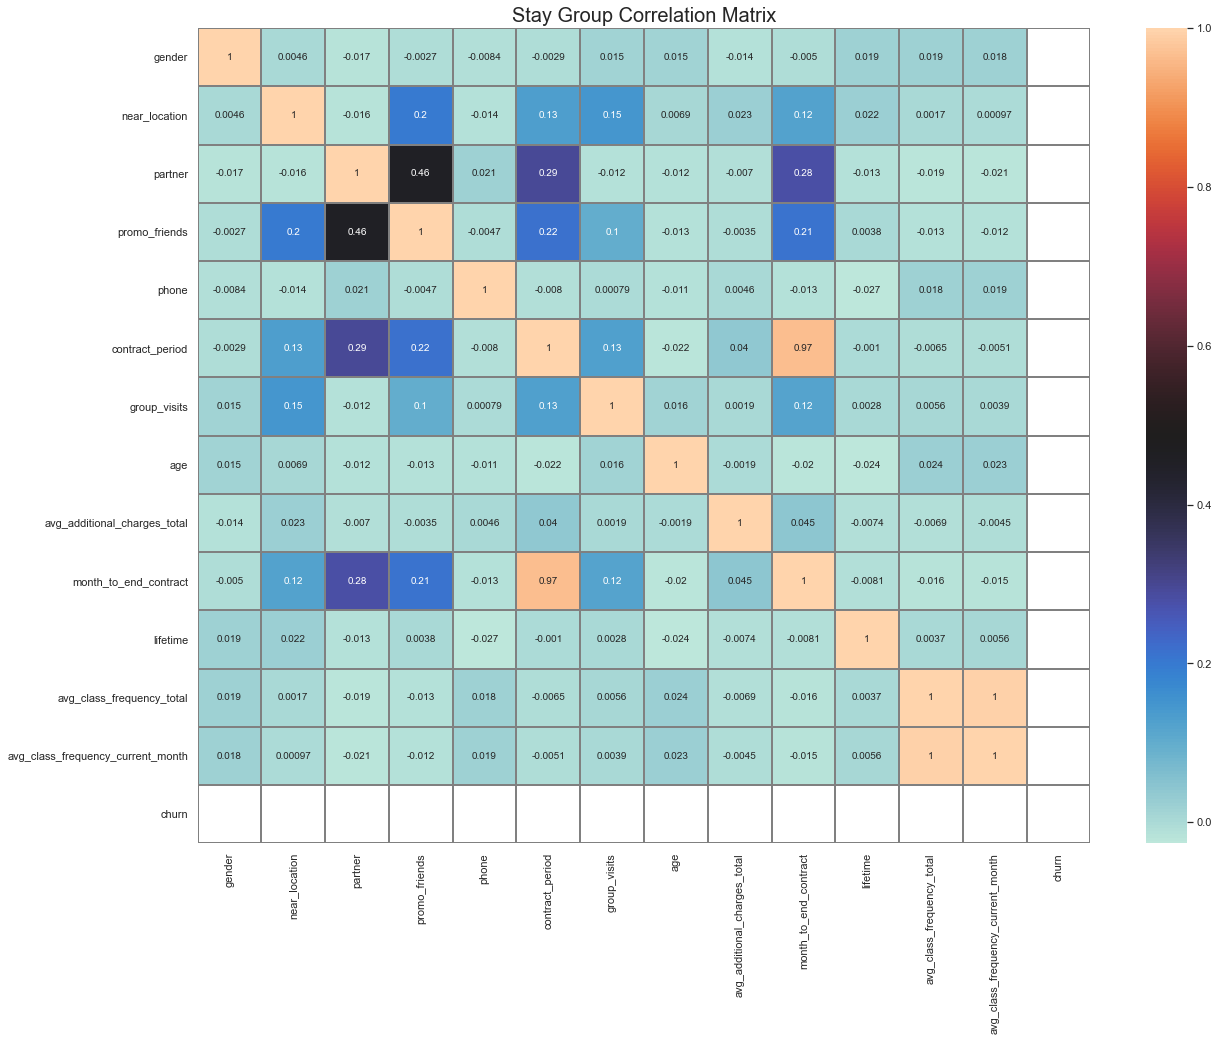

In [1419]:
# correlation matrix for stay group only
cm_stay = df_stay.corr()
plt.figure(figsize = (20,15))
plt.title('Stay Group Correlation Matrix', fontsize=20)
sns.heatmap(cm_stay, linewidths=1, cmap='icefire', linecolor='gray', annot=True)
plt.show()

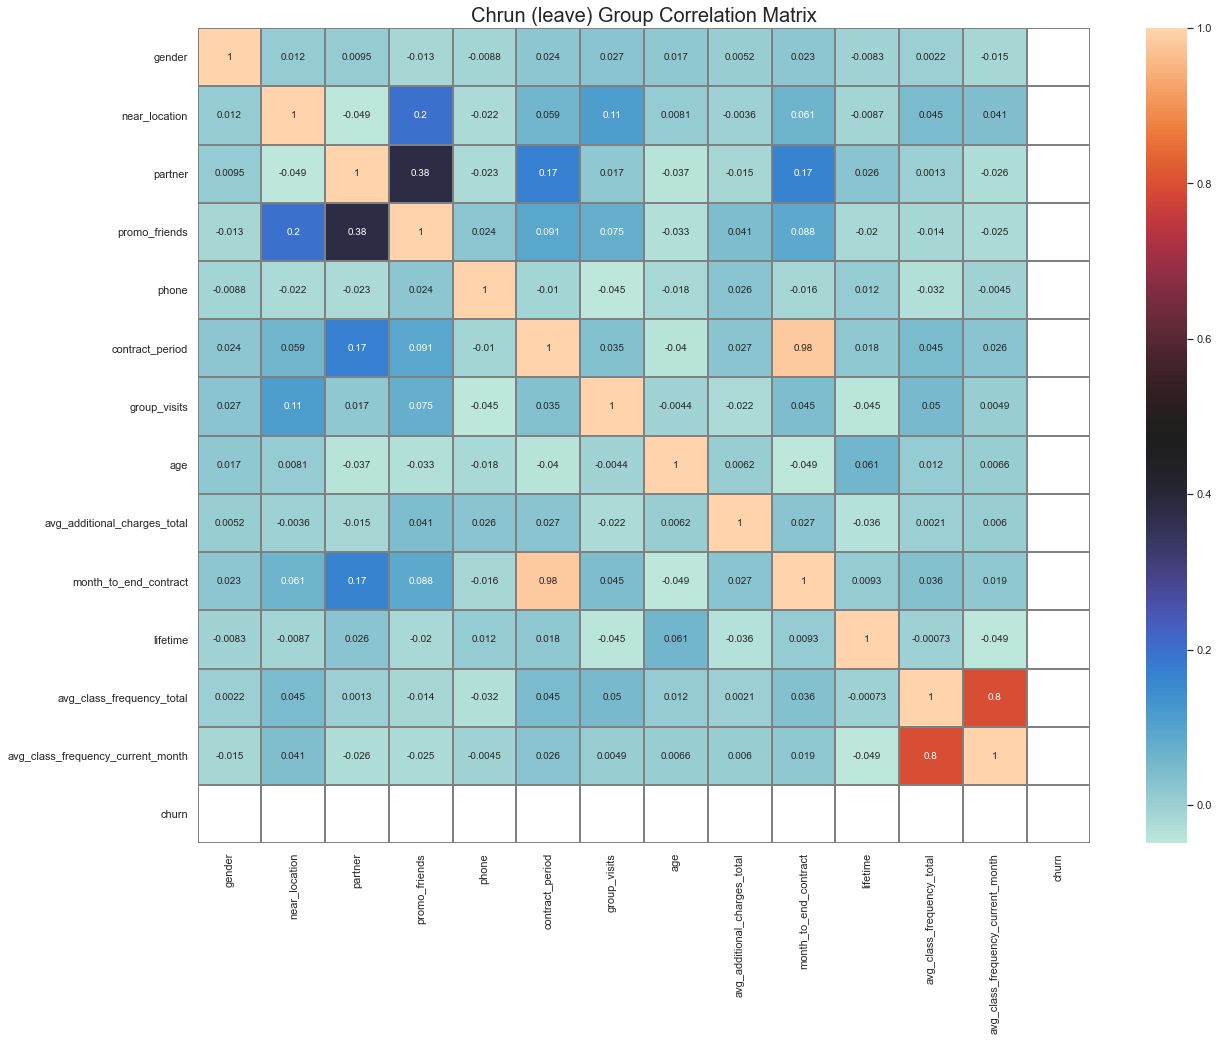

In [1420]:
# correlation matrix for churn group only
cm_left = df_left.corr()
plt.figure(figsize = (20,15))
plt.title('Chrun (leave) Group Correlation Matrix', fontsize=20)
sns.heatmap(cm_left, linewidths=1, cmap='icefire', linecolor='gray', annot=True)
plt.show()

- Reminder: Mutual correlation is undesirable with linear models, so pay special attention to this if you choose such models.

##### Conclusions: 
- highly correlated features ( > 0.8) - risk for multicollinearity:
    - contract_period & month_to_end_contract
    - average_class_frequency_current_month & avg_class_frequency_total

### EDA overall conclusions:

<b> Data Preprocessing: </b> 
  - no missing values in the data.
  - no outliars were observed in histograms nor in the tables
  - no douplicted rows.
    
<b> For ML model: </b>
  - There are numrous features which can cause multicollinearity.


<b> Difference between groups: </b>
  - The data is composed of more customers who stays in the gym then those who left. However, it seems that both have suffiecent users in order to make the analysis
  - Gender show normal distribution as is exepcted, good sign for the quality of the data.
  - In first glance, we see some features show difference between two groups. Some of them can be classified as socially related: promo_friend, group_visit and partner. We can suggest a positive correlation between social activaties and the stay in the gym.
  - near location does seems to play a role in keeping users membership. However, overall the differences is not that dramatic. We can increase the amount of people who choose to stay by focusing on other features which we can have control on.

# Step 3. Build a model to predict user churn

Approach: two df : The original df, and a 2nd df with feature selections

## Divide the data into train and validation sets 

In [1421]:
# divide the data into features (the X matrix) and a target variable (y)
X = df.drop('churn', axis = 1)
y = df['churn']

# divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Train the model on the train set with two methods:
        - logistic regression
        - random forest

### Method 1: Logistic regression

<b> Background </b>
- Logistic regression: Used in order to solve binary classification tasks. The model is used for supervised ML classification.
- Logistic regression model is using a logistic function (the sigmoid curve) which includes a linear regression (z variable).
- The model actually tries to find the probablity of the target variable, using the sigmoid curve and a threshold.


<b>For This model: </b>
- Statement of problem - what is the probability that a customer will cancel his membership
- Target variable - churn. 

In [1422]:
# define the model's algorithm 
model = LogisticRegression()

# train your model
model.fit(X_train, y_train)

# use the trained model to make forecasts
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:,1]

In [1444]:
# create a dictionery to count predicted values
def count_elements(seq) -> dict:
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

display(count_elements(predictions))

{0: 610, 1: 190}

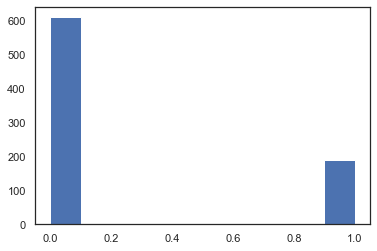

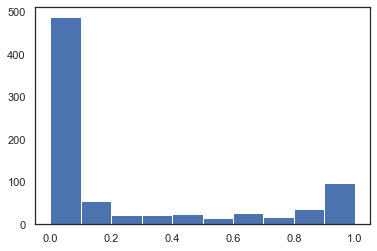

In [1424]:
plt.hist(predictions)
plt.show()
plt.hist(probabilities)
plt.show()

### Method 2: random forest

<b> Background </b>
- The model is a type of ensemble model, a consolidated algorithm consists of a plethora of trees.
- Random forestClassifier: Used in order to solve binary classification tasks. 
- It generates many mutually independent trees in slightly different ways (taking different subsets or features) and reaches a final decision based on their answers.
- Such algorithms are sometimes called black boxes, since it's hard to tell how a particular feature impacted the prediction for an object.

<b>For This model: </b>
- Statement of problem - what is the probability that a customer will cancel his membership.
- Target variable - churn. 

In [1445]:
# random forest

# train StandardScaler on the train set
scaler = StandardScaler()
scaler.fit(X_train)

# transform train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)


In [1446]:
# define the algorithm for the new random forest model
rf_model = RandomForestClassifier(n_estimators = 4, random_state = 0)  
# train the random forest model
rf_model.fit(X_train_st, y_train)
# use the trained model to make predictions
rf_predictions = rf_model.predict(X_test_st) # write your code here
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1] # write your code here

In [1447]:
display(count_elements(rf_predictions))

{0: 631, 1: 169}

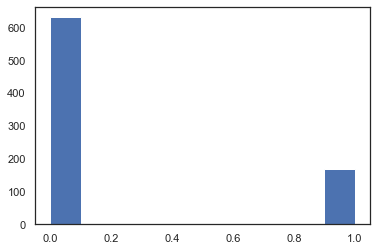

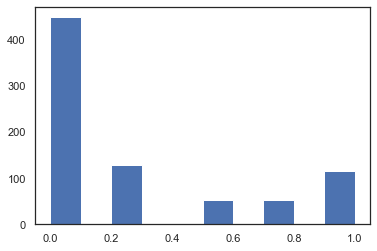

In [1448]:
plt.hist(rf_predictions)
plt.show()
plt.hist(rf_probabilities)
plt.show()

#### Conclusions:
- According to the logistic regression model, 76% of the users in the validation set are likely to stay in the gym.
- According to the random forest model, 78% of the users in the validation set are likely to stay in the gym.

## Evaluate Metrics

### Evaluate accuracy, precision, and recall for both models using the validation data. 


In [1428]:
# function that prints the metrics results
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [1429]:
# apply the function on logistic regression model
print_all_metrics(y_test, predictions, probabilities , title='Metrics for logistic regression:')

Metrics for logistic regression:
	Accuracy: 0.93
	Precision: 0.86
	Recall: 0.83


In [1430]:
# apply the function on random forest model
print_all_metrics(y_test, rf_predictions, rf_probabilities , title='Metrics for random forest:')

Metrics for random forest:
	Accuracy: 0.90
	Precision: 0.84
	Recall: 0.72


#### Use them to compare the models. Which model gave better results?

- The logistic regression resulted with a slightly better metrics scores. The only significant factor was the recall.
- THis means that using the logistic regression, we are less likely to predict false negitive results.

In [1431]:
# Test two: with filtered data 

In [1432]:
# dropping the columns:

# - 
# - 
# - 
# - 



#df2 = df.

# Step 4. Create user clusters

In [1433]:
# Set aside the column with data on churn and identify object (user) clusters:
df_cluster = df.drop(['churn'], axis = 1)

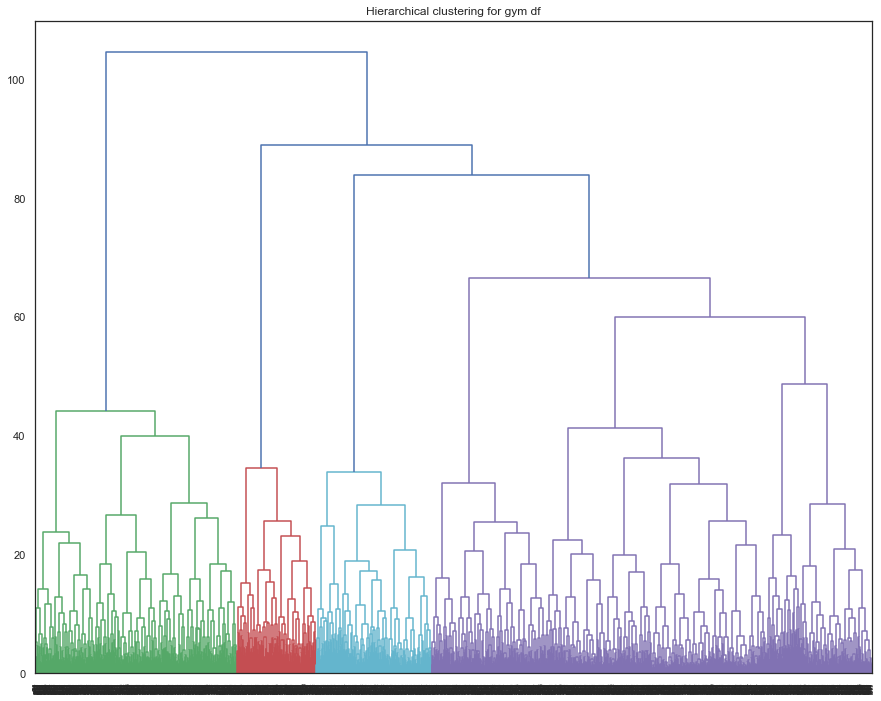

In [1434]:
# Standardize the data
sc = StandardScaler()
x_sc = sc.fit_transform(df_cluster)

# Use the linkage() function to build a matrix of distances based on the standardized feature matrix.
linked = linkage(x_sc, method='ward')

# plot a dendrogram
plt.figure(figsize=(15, 12))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for gym df')
plt.show()

#### Conclusions:
- According to the model, the best way to divide the data is into 4 different clusters (k = 4)

In [1435]:
# Train the clustering model with the K-means algorithm and predict customer clusters

# define the k_means model with 3 clusters
km = KMeans(n_clusters = 5)

# predict the clusters for observations (the algorithm assigns them a number from 0 to 4)
labels = km.fit_predict(x_sc)

# add the clusters to a new column    
df_cluster['cluster_km'] = labels

- Look at the mean feature values for clusters. Does anything catch your eye?

In [1436]:
display(df_cluster.groupby('cluster_km').mean())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
cluster_km,,,,,,,,,,,,,
0,0.483360,1.000000,0.798732,1.000000,0.911252,3.079239,0.445325,29.052298,139.858265,2.873217,3.510301,1.665722,1.547717
1,0.485866,1.000000,0.243816,0.007067,0.901943,1.980565,0.323322,28.231449,131.080131,1.897527,2.460247,1.311989,1.078292
2,0.593085,0.972074,0.287234,0.122340,0.894947,2.902926,0.486702,30.331117,163.452055,2.660904,5.212766,2.929006,2.933183
3,0.500532,0.944622,0.742279,0.490948,0.899894,11.865815,0.552716,29.913738,165.061558,10.849840,4.735889,1.992629,1.983989
4,0.494505,0.000000,0.465201,0.076923,0.915751,2.225275,0.214286,28.478022,134.126172,2.089744,2.805861,1.659607,1.469327


- Plot distributions of features for the clusters. Do you notice anything?

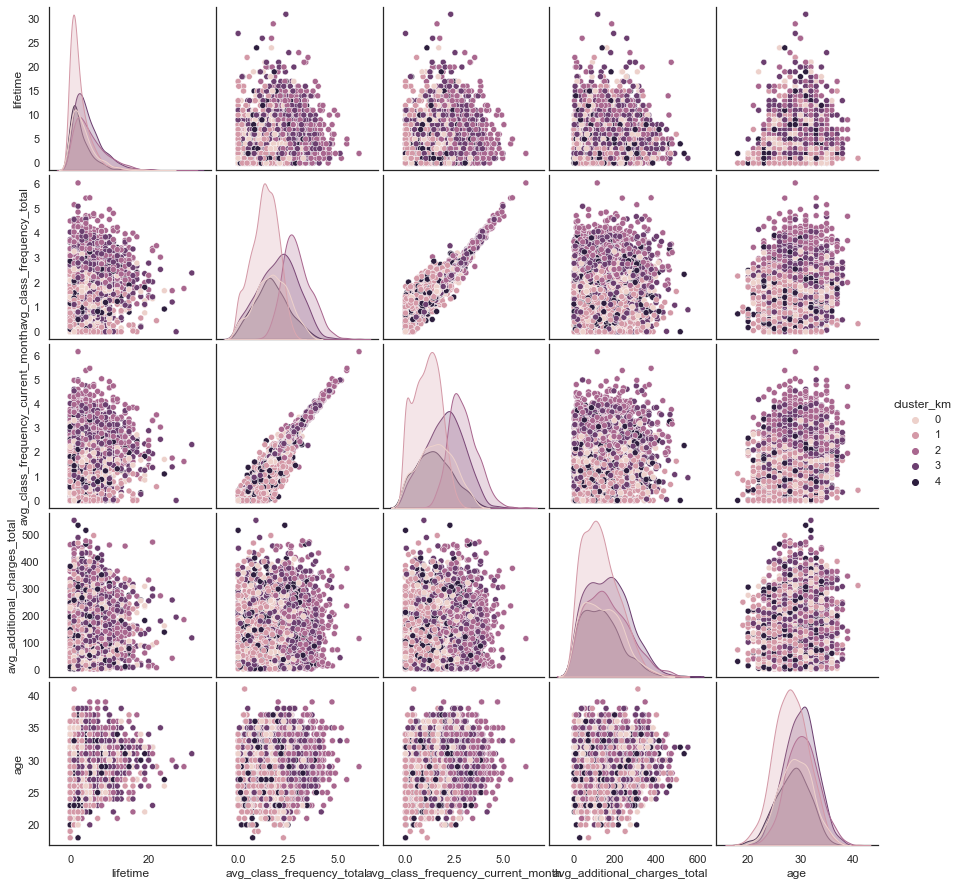

In [1437]:
# run pairplot on the entire df to find which features to filter 
#sns.pairplot(df_cluster, hue="cluster_km")

# creat a series with desired features for pair plot 
non_binary_cluster = non_binary + ['cluster_km']
list_to_remove = ['contract_period', 'month_to_end_contract']
non_binary_cluster =  list(set(non_binary_cluster) - set(list_to_remove))

# plot filtered features
sns.pairplot(df_cluster[non_binary_cluster], hue="cluster_km")



In [1438]:
# Function to oom in some of the pair plots: 
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
           hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()


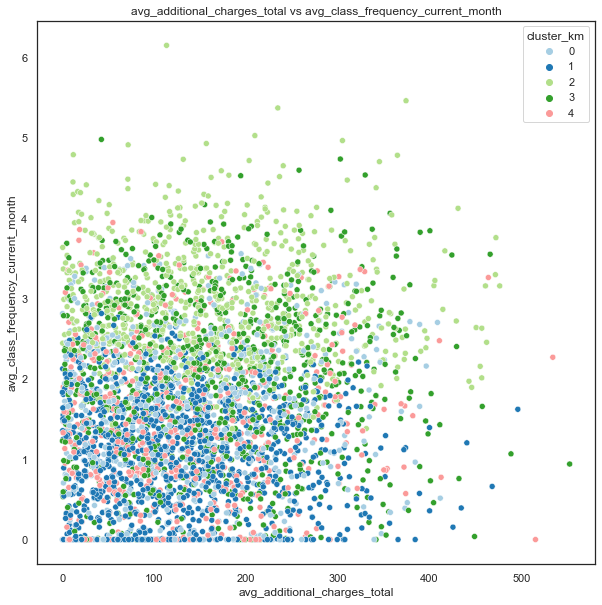

In [1440]:
# avg_additional_charges_total & avg_class_frequency_current_month 
show_clusters_on_plot(df_cluster[non_binary_cluster], 'avg_additional_charges_total', 'avg_class_frequency_current_month', 'cluster_km')

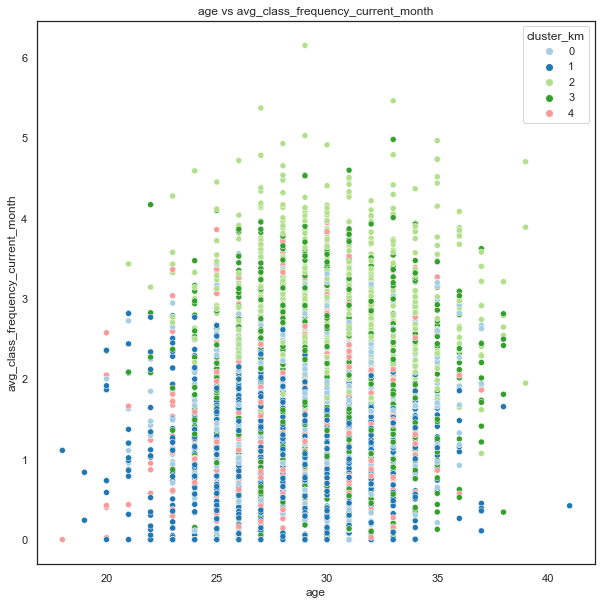

In [1441]:
# age & avg_class_frequency_current_month
show_clusters_on_plot(df_cluster[non_binary_cluster], 'age', 'avg_class_frequency_current_month', 'cluster_km')

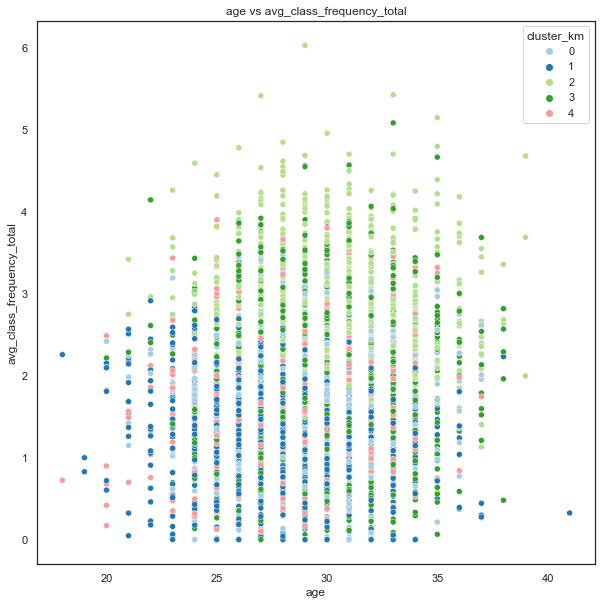

In [1442]:
# age & avg_class_frequency_current_total
show_clusters_on_plot(df_cluster[non_binary_cluster], 'age', 'avg_class_frequency_total', 'cluster_km')

- Calculate the churn rate for each cluster 

In [1443]:
# add cluster columns to the original df
df['cluster_km'] = labels

# create new df by groupby cluster, count total customers for each cluster
cluster_churn_rate = df.groupby('cluster_km')['churn'].count().reset_index()

# rename columns
cluster_churn_rate = cluster_churn_rate.rename(columns = {'churn': 'total_customers'})

# calculate the number of churn customers 
cluster_churn_sum = df.groupby('cluster_km')['churn'].sum().reset_index()

# add number of churn customers to df
cluster_churn_rate['churn'] = cluster_churn_sum['churn']

# calculate churn rates
cluster_churn_rate['churn_percent'] = cluster_churn_rate['churn'] / cluster_churn_rate['total_customers']

# display churn rates 
cluster_churn_rate

,cluster_km,total_customers,churn,churn_percent
0,0,631,170,0.269414
1,1,1132,583,0.515018
2,2,752,42,0.055851
3,3,939,21,0.022364
4,4,546,245,0.448718
